<a href="https://colab.research.google.com/github/June823/-DOCTYPE/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MNIST CNN - Google Colab ready
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs('/content/mnist_outputs', exist_ok=True)

# 1. Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Preprocess
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

# 3. Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# 4. Train
history = model.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.1)

# 5. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# 6. Save model
model.save('/content/mnist_cnn.h5')

# 7. Save 5 sample prediction images
import random
indices = np.random.choice(len(x_test), 5, replace=False)
for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28,28)
    pred = model.predict(x_test[idx:idx+1])
    pred_label = np.argmax(pred)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {pred_label}  True: {y_test[idx]}")
    plt.axis('off')
    plt.savefig(f'/content/mnist_outputs/sample_pred_{i}.png', bbox_inches='tight')
    plt.clf()

print("Saved prediction images in /content/mnist_outputs/")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.7863 - loss: 0.6807 - val_accuracy: 0.9813 - val_loss: 0.0648
Epoch 2/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.9660 - loss: 0.1125 - val_accuracy: 0.9853 - val_loss: 0.0492
Epoch 3/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9760 - loss: 0.0812 - val_accuracy: 0.9888 - val_loss: 0.0413
Epoch 4/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.9807 - loss: 0.0634 - val_accuracy: 0.9892 - val_loss: 0.0401
Epoch 5/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.9833 - loss: 0.0561 - val_accuracy: 0.9913 - val_loss: 0.0332
Epoch 6/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.9859 - loss: 0.0472 - val_accuracy: 0.9908 - val_loss: 0.0335
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9884 - loss: 0.0333


Test accuracy: 0.9904999732971191
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Saved prediction images in /content/mnist_outputs/


<Figure size 640x480 with 0 Axes>

In [2]:
# spaCy NER + rule-based sentiment - Colab
!pip install -q spacy
!python -m spacy download en_core_web_sm

import spacy
from pathlib import Path
nlp = spacy.load("en_core_web_sm")
reviews = [
    "I love the Samsung Galaxy phone. The battery lasts long!",
    "The Apple MacBook is too expensive and the keyboard is bad.",
    "This Sony camera is amazing, picture quality is perfect.",
    "The JBL headphones broke after 2 weeks. Very disappointed!"
]

positive_words = ["love", "good", "excellent", "amazing", "perfect", "great", "long"]
negative_words = ["bad", "poor", "disappointed", "broke", "expensive", "terrible", "slow"]

def analyze_sentiment(text):
    text_lower = text.lower()
    score = sum(1 for w in positive_words if w in text_lower) - sum(1 for w in negative_words if w in text_lower)
    return "Positive" if score>0 else ("Negative" if score<0 else "Neutral")

out_path = Path("/content/spacy_outputs.txt")
with out_path.open("w", encoding="utf-8") as f:
    for r in reviews:
        doc = nlp(r)
        f.write("Review: " + r + "\n")
        f.write("Entities:\n")
        for ent in doc.ents:
            f.write(f" - {ent.text} ({ent.label_})\n")
        s = analyze_sentiment(r)
        f.write("Sentiment: " + s + "\n")
        f.write("\n")
print("Saved results to", out_path)
print(open(out_path).read())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 109.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Saved results to /content/spacy_outputs.txt
Review: I love the Samsung Galaxy phone. The battery lasts long!
Entities:
 - Samsung Galaxy (ORG)
Sentiment: Positive

Review: The Apple MacBook is too expensive and the keyboard is bad.
Entities:
 - The Apple MacBook (ORG)
Sentiment: Negative

Review: This Sony camera is amazing, picture quality is perfect.
Entities:
 - Sony (ORG)
Sentiment: Positive

Review: The JBL headphones broke after 2 weeks. Very disappointed!
Entities:
 - JBL (ORG)
 - 2 weeks (DATE)
Sentiment: Negative




In [3]:
# Task 1: Sorting list of dicts - AI vs Manual
import time, random

def sort_dicts_by_key_ai(lst, key):
    # AI-suggested: pythonic sorted()
    return sorted(lst, key=lambda d: d.get(key, None))

def sort_dicts_by_key_manual(lst, key):
    # Manual insertion-sort style (for small lists demonstration)
    arr = lst.copy()
    for i in range(1, len(arr)):
        current = arr[i]
        j = i - 1
        while j >= 0 and (arr[j].get(key, None) is None or (current.get(key, None) is not None and arr[j].get(key) > current.get(key))):
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = current
    return arr

# Create test data
def random_dicts(n=1000):
    keys = ['a','b','c','score']
    out = []
    for i in range(n):
        d = {k: random.randint(0,1000) for k in keys}
        out.append(d)
    return out

data = random_dicts(1000)
t0 = time.time()
_ = sort_dicts_by_key_ai(data, 'score')
t1 = time.time()
_ = sort_dicts_by_key_manual(data[:200], 'score')  # manual on smaller slice
t2 = time.time()
print("AI sort time (1000 items):", t1-t0)
print("Manual sort time (200 items):", t2-t1)
print("Conclusion: built-in sorted() is far more efficient for larger lists.")


AI sort time (1000 items): 0.00034165382385253906
Manual sort time (200 items): 0.0023193359375
Conclusion: built-in sorted() is far more efficient for larger lists.


In [7]:
# Install Selenium
!pip install selenium

# Install Chromium & ChromeDriver
!apt-get update
!apt install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

def run_login_test(url, username, password, headless=True):
    chrome_options = Options()
    if headless:
        chrome_options.add_argument("--headless")  # Run in headless mode
        chrome_options.add_argument("--no-sandbox")
        chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_argument("--window-size=1920,1080")

    # Use Chromium in Colab
    driver = webdriver.Chrome('chromedriver', options=chrome_options)

    try:
        driver.get(url)
        # Update these IDs to match the actual page
        driver.find_element(By.ID, "username").send_keys(username)
        driver.find_element(By.ID, "password").send_keys(password)
        driver.find_element(By.ID, "login-button").click()
        time.sleep(2)
        try:
            driver.find_element(By.ID, "dashboard")  # Check if dashboard appears
            return True
        except:
            return False
    finally:
        driver.quit()



Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

Accuracy: 0.9912280701754386
Macro F1: 0.9912265512265512

Classification report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        38
         Low       1.00      0.97      0.99        38
      Medium       0.97      1.00      0.99        38

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Saved confusion matrix to /content/predictive_outputs/priority_confusion.png


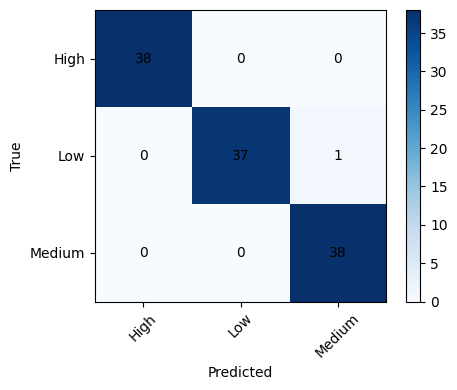

In [8]:
# Predictive Analytics - RandomForest priority prediction (Colab)
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os

os.makedirs('/content/predictive_outputs', exist_ok=True)

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
radius = X['mean radius']
priority = pd.qcut(radius, q=3, labels=['Low', 'Medium', 'High'])
le = LabelEncoder()
y = le.fit_transform(priority)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", acc)
print("Macro F1:", f1)
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=le.inverse_transform([0,1,2])))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4)); plt.imshow(cm, cmap='Blues'); plt.colorbar()
plt.xticks(range(3), le.inverse_transform([0,1,2]), rotation=45)
plt.yticks(range(3), le.inverse_transform([0,1,2]))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha='center', va='center')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.tight_layout()
plt.savefig('/content/predictive_outputs/priority_confusion.png', dpi=150)
print("Saved confusion matrix to /content/predictive_outputs/priority_confusion.png")
